# Marketing Campaign Performance Insights

# 1) Load the Dataset

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
url = 'https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/marketing_campaign.csv'
df = pd.read_csv(url)
df

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,TechCorp,Email,Women 25-34,30 days,Facebook,5.294194,9344,62.94,Houston,English,3045,67836,5,Tech Enthusiasts,01-01-2023
1,2,Innovate Industries,Influencer,Women 35-44,45 days,Google Ads,3.326375,8783,10.67,"Washington, D.C.",German,1944,66361,4,Foodies,01-01-2023
2,3,NexGen Systems,Social Media,Women 25-34,45 days,Instagram,4.056375,9111,73.20,Miami,Spanish,3156,86240,8,Fashionistas,01-01-2023
3,4,Innovate Industries,Email,Women 25-34,45 days,Instagram,4.496375,7420,60.92,Seattle,Spanish,2388,58251,6,Foodies,01-01-2023
4,5,Data Tech Solutions,Influencer,Men 25-34,30 days,Google Ads,4.405930,2146,138.82,Chicago,English,1025,34407,5,Tech Enthusiasts,01-01-2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22024,22025,Data Tech Solutions,Search,Men 18-24,30 days,Website,4.379947,4748,-7.01,New York,Spanish,883,20848,8,Fashionistas,31-12-2023
22025,22026,Data Tech Solutions,Social Media,Men 18-24,45 days,Google Ads,5.889947,5567,-87.96,Houston,Mandarin,134,2332,8,Outdoor Adventurers,31-12-2023
22026,22027,TechCorp,Influencer,Women 25-34,30 days,Facebook,4.319947,7154,-9.21,Seattle,German,1299,31078,9,Outdoor Adventurers,31-12-2023
22027,22028,Data Tech Solutions,Search,Men 18-24,45 days,Facebook,3.959947,6471,95.18,Dallas,Mandarin,2526,66129,8,Health & Wellness,31-12-2023


# 2) Descriptive analysis

In [5]:
# Basic Structure
# Print the first few rows of the dataset to get an overview of the data.
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,TechCorp,Email,Women 25-34,30 days,Facebook,5.294194,9344,62.94,Houston,English,3045,67836,5,Tech Enthusiasts,01-01-2023
1,2,Innovate Industries,Influencer,Women 35-44,45 days,Google Ads,3.326375,8783,10.67,"Washington, D.C.",German,1944,66361,4,Foodies,01-01-2023
2,3,NexGen Systems,Social Media,Women 25-34,45 days,Instagram,4.056375,9111,73.20,Miami,Spanish,3156,86240,8,Fashionistas,01-01-2023
3,4,Innovate Industries,Email,Women 25-34,45 days,Instagram,4.496375,7420,60.92,Seattle,Spanish,2388,58251,6,Foodies,01-01-2023
4,5,Data Tech Solutions,Influencer,Men 25-34,30 days,Google Ads,4.405930,2146,138.82,Chicago,English,1025,34407,5,Tech Enthusiasts,01-01-2023


In [12]:
# Obtain the number of rows and columns in the dataset.
rows,columns = df.shape
print(f"no.of.rows: ",rows)
print(f"no.of.columns: ",rows)

no.of.rows:  22029
no.of.columns:  22029


In [13]:
#Get a concise summary of the dataset, including the data types and non-null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22029 entries, 0 to 22028
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Campaign_ID       22029 non-null  int64  
 1   Company           22029 non-null  object 
 2   Campaign_Type     22029 non-null  object 
 3   Target_Audience   22029 non-null  object 
 4   Duration          22029 non-null  object 
 5   Channel_Used      22029 non-null  object 
 6   Conversion_Rate   22029 non-null  float64
 7   Acquisition_Cost  22029 non-null  int64  
 8   ROI               22029 non-null  float64
 9   Location          22029 non-null  object 
 10  Language          22029 non-null  object 
 11  Clicks            22029 non-null  int64  
 12  Impressions       22029 non-null  int64  
 13  Engagement_Score  22029 non-null  int64  
 14  Customer_Segment  22029 non-null  object 
 15  Date              22029 non-null  object 
dtypes: float64(2), int64(5), object(9)
memor

In [14]:
# Generate descriptive statistics for numerical columns.
df.describe()

,Campaign_ID,Conversion_Rate,Acquisition_Cost,ROI,Clicks,Impressions,Engagement_Score
count,22029.000000,22029.000000,22029.000000,22029.000000,22029.000000,22029.000000,22029.000000
mean,11015.000000,4.757232,5522.740842,182.863648,2223.807572,50610.402787,6.582323
std,6359.368876,0.960393,2597.666260,301.619721,1394.166380,28542.979123,1.458804
min,1.000000,2.015723,1000.000000,-98.300000,30.000000,1001.000000,4.000000
25%,5508.000000,4.130705,3286.000000,-4.080000,1067.000000,25804.000000,5.000000
50%,11015.000000,4.761527,5525.000000,93.650000,2088.000000,50858.000000,7.000000
75%,16522.000000,5.429335,7766.000000,247.310000,3212.000000,75165.000000,8.000000
max,22029.000000,7.469907,9999.000000,3109.790000,6887.000000,99999.000000,9.000000


In [17]:
# Data Exploration:
# Print the number of unique Campaign_ID values in the dataset.
df['Campaign_ID'].nunique()

22029

In [22]:
# List the unique values of the Location and Customer_Segment columns.
print(f'unique_value_of_Location :',df['Location'].unique())
print('\n')
print(f'unique_value_of_Customer_Segment :',df['Customer_Segment'].unique())

unique_value_of_Location : ['Houston' 'Washington, D.C.' 'Miami' 'Seattle' 'Chicago' 'Los Angeles'
 'Atlanta' 'Dallas' 'New York' 'San Francisco']


unique_value_of_Customer_Segment : ['Tech Enthusiasts' 'Foodies' 'Fashionistas' 'Outdoor Adventurers'
 'Health & Wellness']


# 3) Exploratory Data Analysis (EDA) and Visualization

# Campaign Performance:

<function matplotlib.pyplot.show(close=None, block=None)>

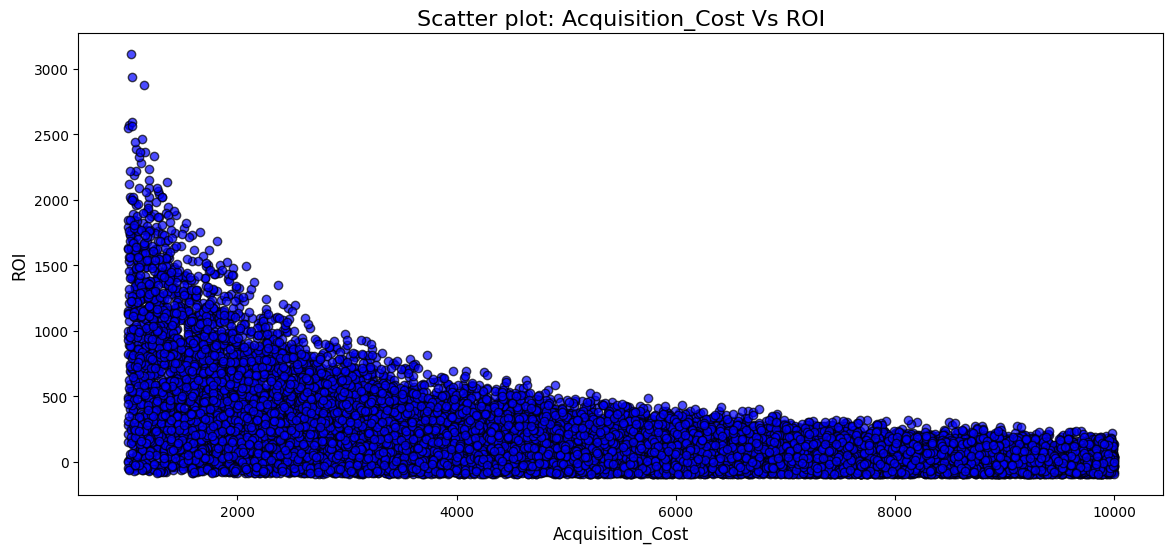

In [38]:

# Plot a scatter plot to visualize the relationship between Acquisition_Cost and ROI.

x = df['Acquisition_Cost']
y = df['ROI']
plt.figure(figsize=(14,6))
plt.scatter(x, y, alpha = 0.7, c = 'blue', edgecolor = 'k')
plt.title('Scatter plot: Acquisition_Cost Vs ROI', fontsize = 16)
plt.xlabel('Acquisition_Cost', fontsize = 12)
plt.ylabel('ROI', fontsize = 12)
plt.show

# Through scatter plot, there is a negative coorelation between the Acqusition_cost and ROI, This means when Acqusition_cost increases, the ROI decrease

In [39]:
df.columns

Index(['Campaign_ID', 'Company', 'Campaign_Type', 'Target_Audience',
       'Duration', 'Channel_Used', 'Conversion_Rate', 'Acquisition_Cost',
       'ROI', 'Location', 'Language', 'Clicks', 'Impressions',
       'Engagement_Score', 'Customer_Segment', 'Date'],
      dtype='object')

In [51]:
# Create a bar chart to visualize the average Conversion_Rate for different Channel_Used, categorized by Campaign_Type.

avg_conversion_rate = df.groupby(['Channel_Used','Campaign_Type'])['Conversion_Rate'].mean().reset_index()
print(avg_conversion_rate)

   Channel_Used Campaign_Type  Conversion_Rate
0         Email       Display         4.697857
1         Email         Email         4.762608
2         Email    Influencer         4.759144
3         Email        Search         4.710543
4         Email  Social Media         4.724303
5      Facebook       Display         4.836175
6      Facebook         Email         4.754791
7      Facebook    Influencer         4.868923
8      Facebook        Search         4.731633
9      Facebook  Social Media         4.705616
10   Google Ads       Display         4.779902
11   Google Ads         Email         4.721141
12   Google Ads    Influencer         4.788560
13   Google Ads        Search         4.762025
14   Google Ads  Social Media         4.698448
15    Instagram       Display         4.760322
16    Instagram         Email         4.855438
17    Instagram    Influencer         4.722847
18    Instagram        Search         4.750821
19    Instagram  Social Media         4.696410
20      Websi

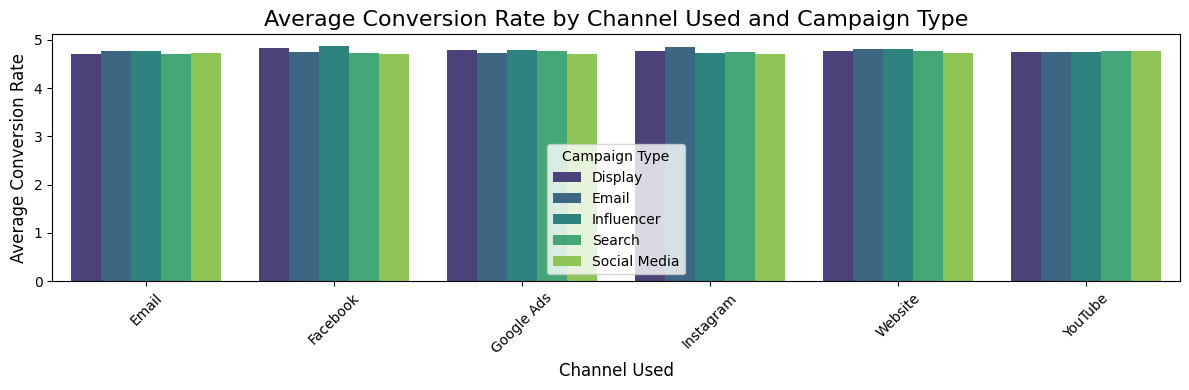

In [48]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Channel_Used', y='Conversion_Rate', hue='Campaign_Type', data=avg_conversion_rate, palette='viridis')


plt.title('Average Conversion Rate by Channel Used and Campaign Type', fontsize=16)
plt.xlabel('Channel Used', fontsize=12)
plt.ylabel('Average Conversion Rate', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Campaign Type', fontsize=10)
plt.tight_layout()


plt.show()

# the average Conversion_Rate for different Channel_Used, categorized by Campaign_Type is almost same in all platform

C:\Users\HI\AppData\Local\Temp\ipykernel_17184\2910967859.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Campaign_Type', y='Engagement_Score', data=df, palette='Set2')


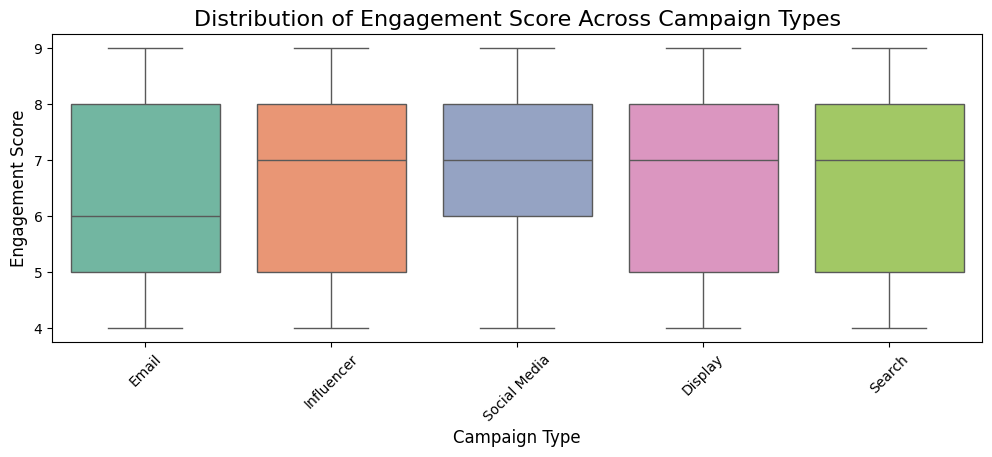

In [54]:
# Visualize the distribution of Engagement_Score across different Campaign_Type using a box plot.

plt.figure(figsize=(12, 4))
sns.boxplot(x='Campaign_Type', y='Engagement_Score', data=df, palette='Set2')


plt.title('Distribution of Engagement Score Across Campaign Types', fontsize=16)
plt.xlabel('Campaign Type', fontsize=12)
plt.ylabel('Engagement Score', fontsize=12)
plt.xticks(rotation=45, fontsize=10)


plt.show()

# overall median engagement score for campaign type is equal but in email little less

C:\Users\HI\AppData\Local\Temp\ipykernel_17184\2624260666.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Company', y='ROI', data=avg_roi, palette='coolwarm')


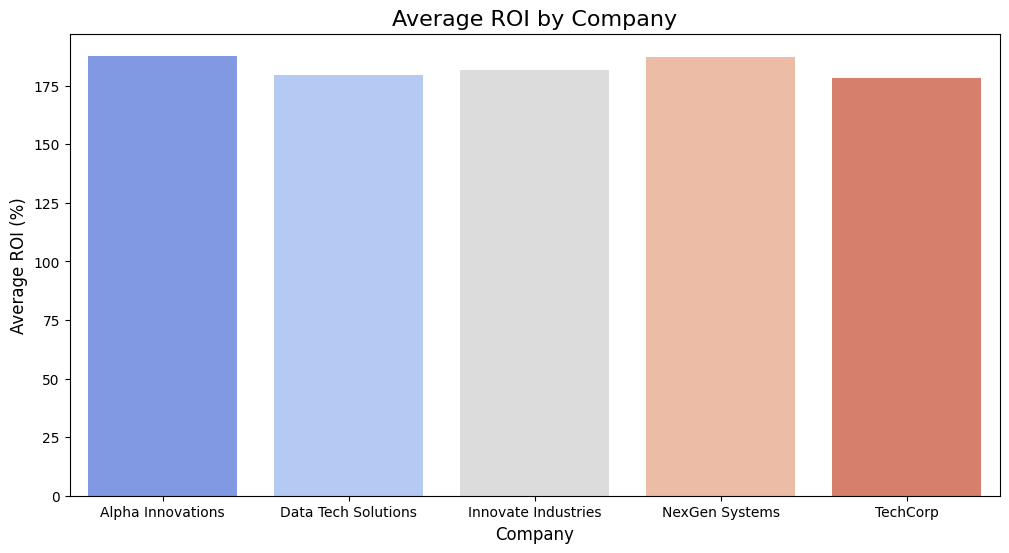

In [58]:
# Analyze the average ROI by Company using a bar chart to compare the profitability of campaigns conducted by different companies.

avg_roi = df.groupby('Company')['ROI'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Company', y='ROI', data=avg_roi, palette='coolwarm')


plt.title('Average ROI by Company', fontsize=16)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Average ROI (%)', fontsize=12)
plt.xticks(rotation=0, fontsize=10)

plt.show()

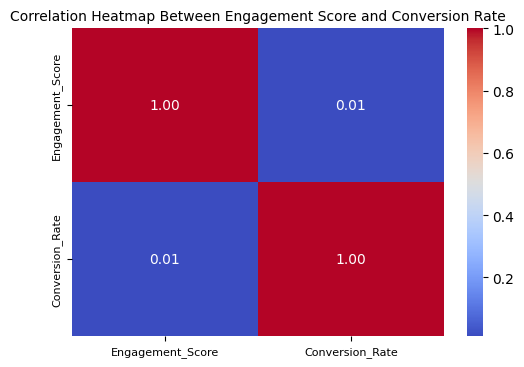

In [65]:
# Examine the correlation between Engagement_Score and Conversion_Rate using a heatmap.

correlation_matrix = df[['Engagement_Score', 'Conversion_Rate']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)


plt.title('Correlation Heatmap Between Engagement Score and Conversion Rate', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)


plt.show()

# From the heat map colerration for engagement_score and coversion rate is low

# Customer Segmentation:

C:\Users\HI\AppData\Local\Temp\ipykernel_17184\3562957290.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Target_Audience', data=df, palette='Set2')


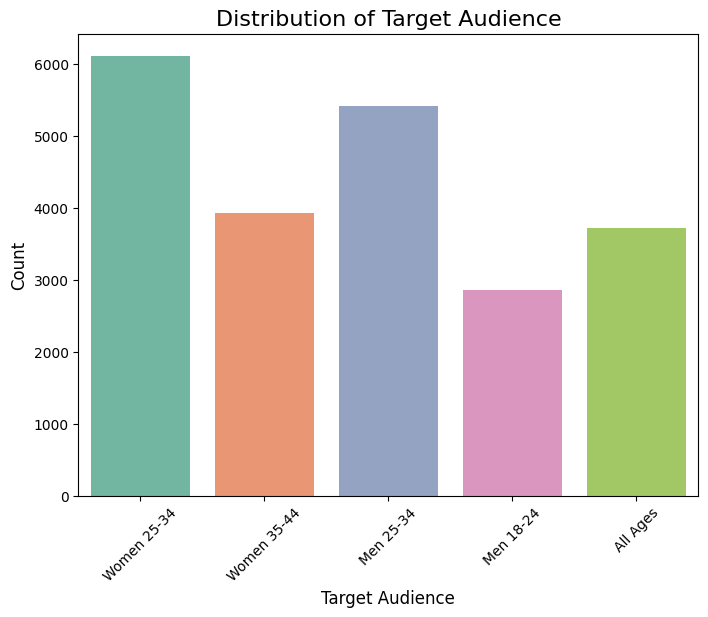

In [67]:
# Create a count plot to visualize the distribution of Target_Audience.

plt.figure(figsize=(8, 6))
sns.countplot(x='Target_Audience', data=df, palette='Set2')


plt.title('Distribution of Target Audience', fontsize=16)
plt.xlabel('Target Audience', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)

plt.show()


# From this count plot the age between (25 - 34) both women and men are high

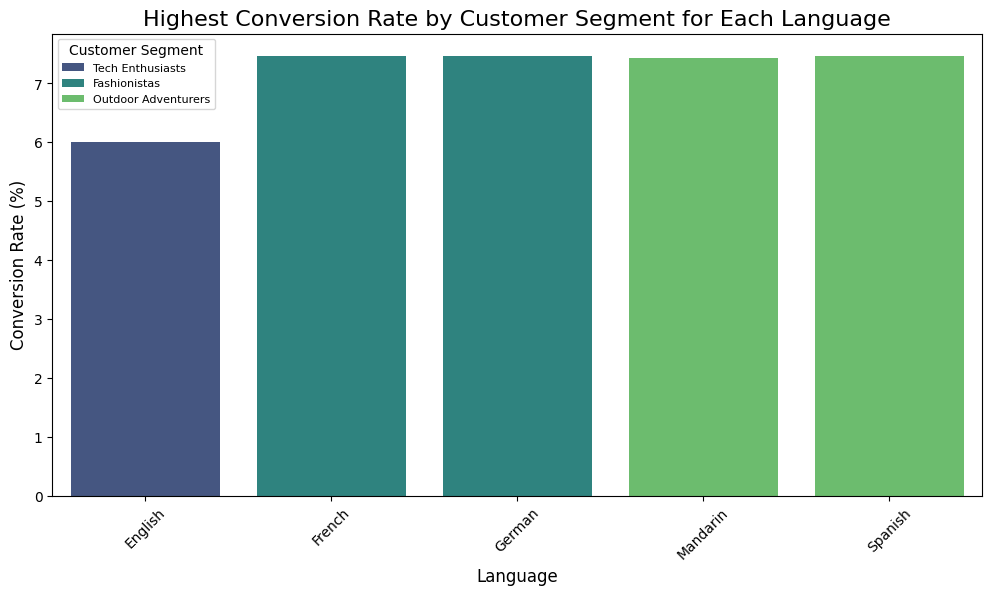

In [80]:
# Identify which Customer_Segment has the highest Conversion_Rate for each Language using a bar chart.


highest_conversion_rate = df.loc[df.groupby('Language')['Conversion_Rate'].idxmax()]


plt.figure(figsize=(12, 6))
sns.barplot(x='Language', y='Conversion_Rate', hue='Customer_Segment', data=highest_conversion_rate, palette='viridis')


plt.title('Highest Conversion Rate by Customer Segment for Each Language', fontsize=16)
plt.xlabel('Language', fontsize=12)
plt.ylabel('Conversion Rate (%)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Customer Segment', fontsize=8)

plt.show()


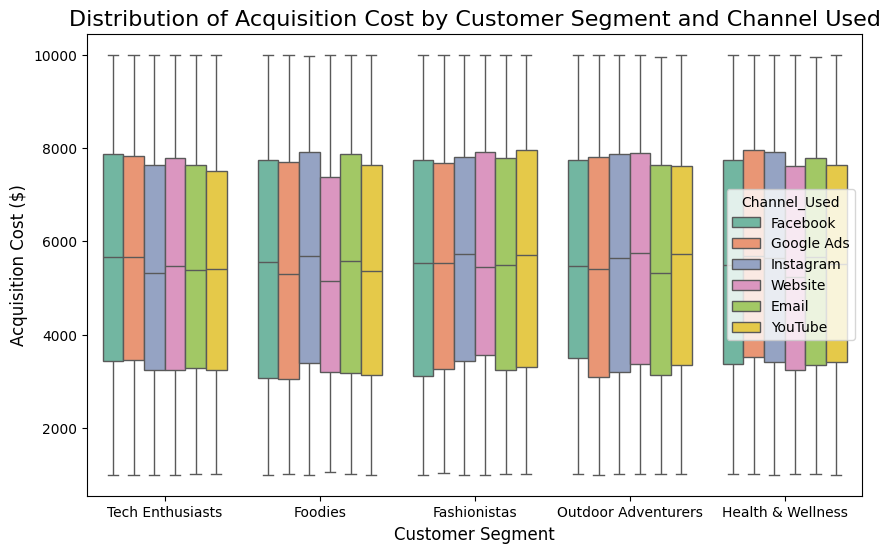

In [82]:
# Visualize the distribution of Acquisition_Cost across each Customer_Segment, categorized by Channel_Used, using a box plot.

plt.figure(figsize=(10, 6))
sns.boxplot(x='Customer_Segment', y='Acquisition_Cost', hue='Channel_Used', data=df, palette='Set2')

# Customize the plot
plt.title('Distribution of Acquisition Cost by Customer Segment and Channel Used', fontsize=16)
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Acquisition Cost ($)', fontsize=12)
plt.xticks(rotation=0, fontsize=10)


plt.show()

C:\Users\HI\AppData\Local\Temp\ipykernel_17184\3935923275.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Language', y='Conversion_Rate', data=avg_conversion_rate, palette='viridis')


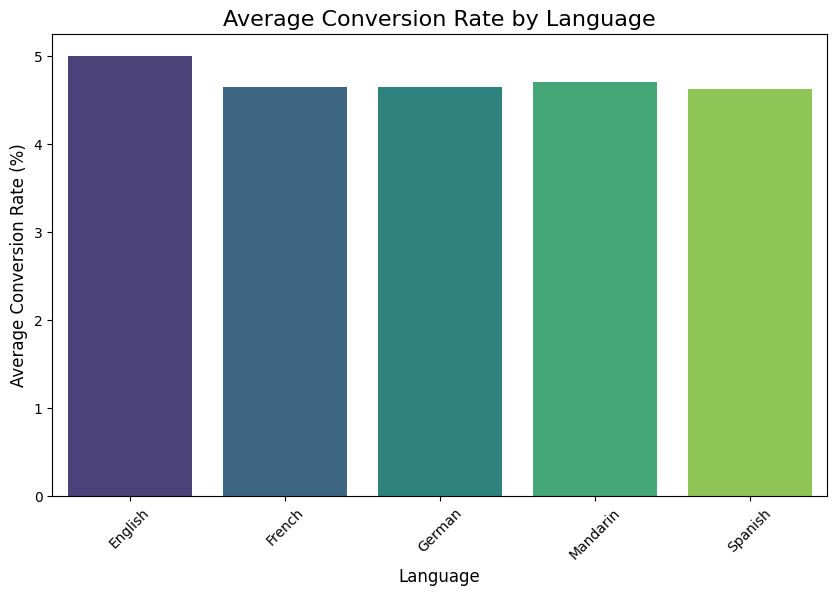

In [84]:
# Analyze average Conversion_Rate by Language using a bar chart to compare the effectiveness of campaigns conducted in different languages

avg_conversion_rate = df.groupby('Language')['Conversion_Rate'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Language', y='Conversion_Rate', data=avg_conversion_rate, palette='viridis')


plt.title('Average Conversion Rate by Language', fontsize=16)
plt.xlabel('Language', fontsize=12)
plt.ylabel('Average Conversion Rate (%)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)

plt.show()

# Channel Effectiveness:

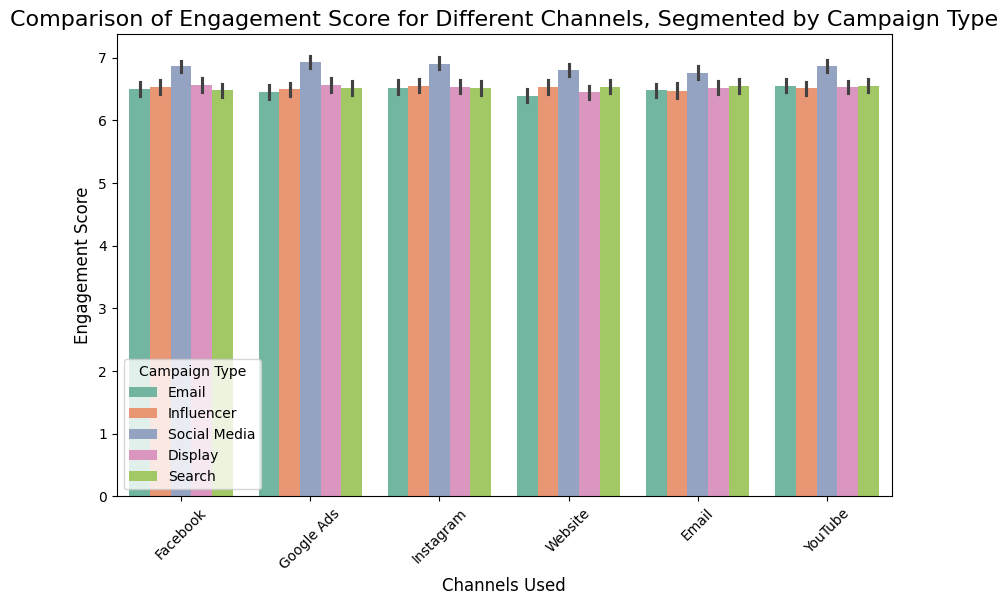

In [96]:
# Compare the Engagement_Score for different Channels_Used, segmented by Campaign_Type, using a bar chart.

plt.figure(figsize=(10, 6))
sns.barplot(x='Channel_Used', y='Engagement_Score', hue='Campaign_Type', data=df, palette='Set2')


plt.title('Comparison of Engagement Score for Different Channels, Segmented by Campaign Type', fontsize=16)
plt.xlabel('Channels Used', fontsize=12)
plt.ylabel('Engagement Score', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Campaign Type', fontsize=10)

plt.show()

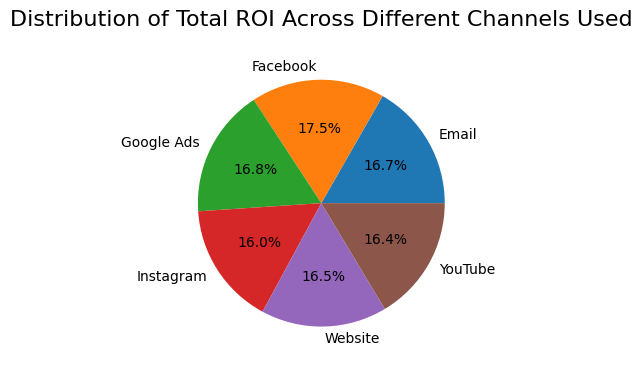

In [100]:
# Show the distribution of total ROI across different Channels_Used using a pie chart.

total_roi_by_channel = df.groupby('Channel_Used')['ROI'].sum().reset_index()


plt.figure(figsize=(4, 4))
plt.pie(total_roi_by_channel['ROI'], labels=total_roi_by_channel['Channel_Used'], autopct='%1.1f%%')
plt.title('Distribution of Total ROI Across Different Channels Used', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.


plt.show()

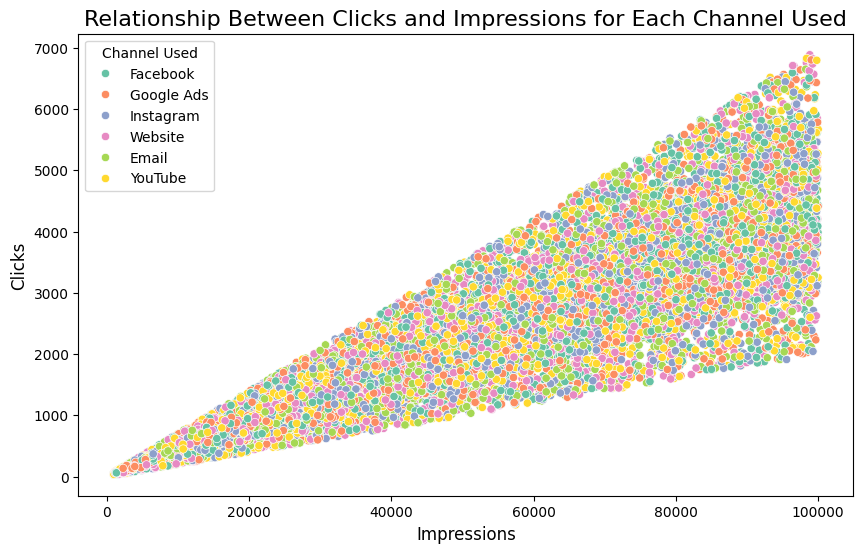

In [104]:
# Plot a scatter plot to show the relationship between Clicks and Impressions for each Channel_Used.

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Impressions', y='Clicks', hue='Channel_Used', data=df, palette='Set2' )


plt.title('Relationship Between Clicks and Impressions for Each Channel Used', fontsize=16)
plt.xlabel('Impressions', fontsize=12)
plt.ylabel('Clicks', fontsize=12)
plt.legend(title='Channel Used', fontsize=10)

plt.show()

# Time-Based Analysis:

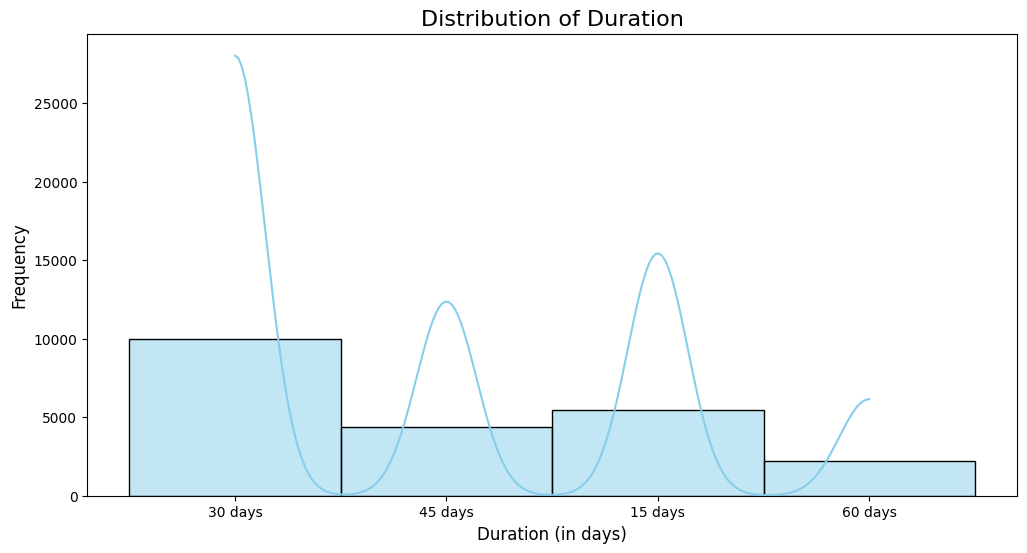

In [114]:
# Plot the distribution of Duration using a histogram.

plt.figure(figsize=(12, 6))
sns.histplot(df['Duration'], kde=True, bins=5, color='skyblue', edgecolor='black')


plt.title('Distribution of Duration', fontsize=16)
plt.xlabel('Duration (in days)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()


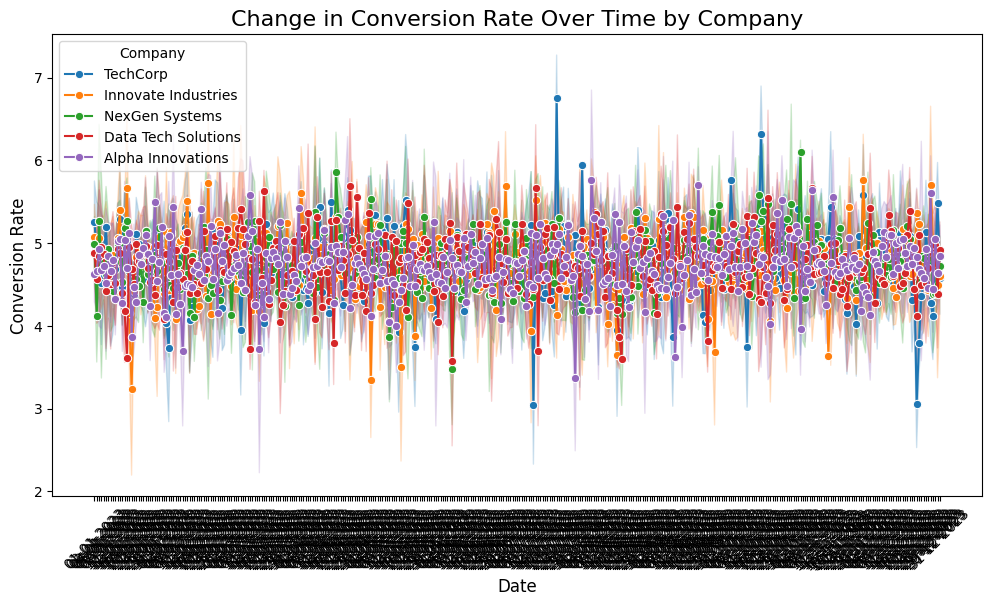

In [115]:
# Analyze how the overall Conversion_Rate has changed over Date for each Company using a line chart.

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Conversion_Rate', hue='Company', data=df, marker='o')


plt.title('Change in Conversion Rate Over Time by Company', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.xticks(rotation=45, fontsize=10)

plt.show()

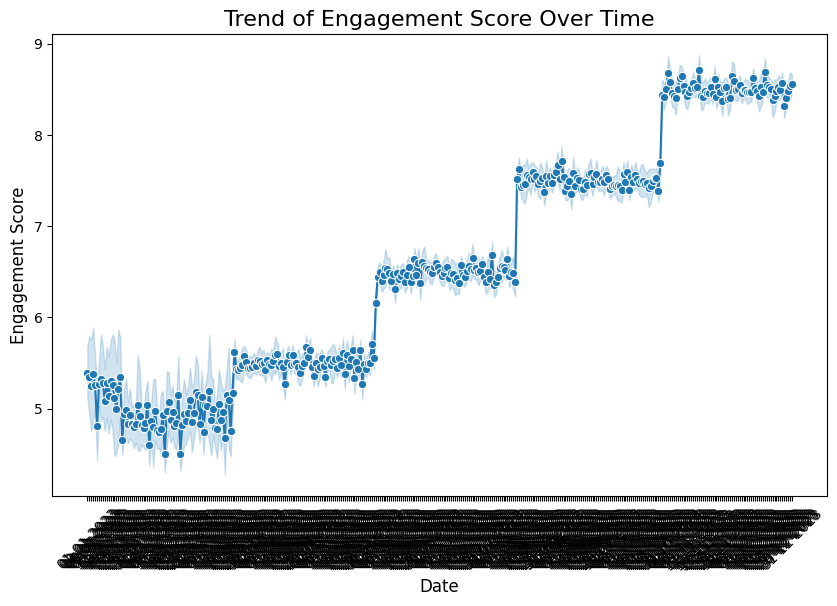

In [117]:
# Examine the trend of Engagement_Score over Date with a line chart.

plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Engagement_Score', data=df, marker='o')


plt.title('Trend of Engagement Score Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Engagement Score', fontsize=12)
plt.xticks(rotation=45, fontsize=10)


plt.show()

# Geographic Analysis:

C:\Users\HI\AppData\Local\Temp\ipykernel_17184\3984939431.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Location', y='Acquisition_Cost', data=acquisition_cost_by_location, palette='viridis')


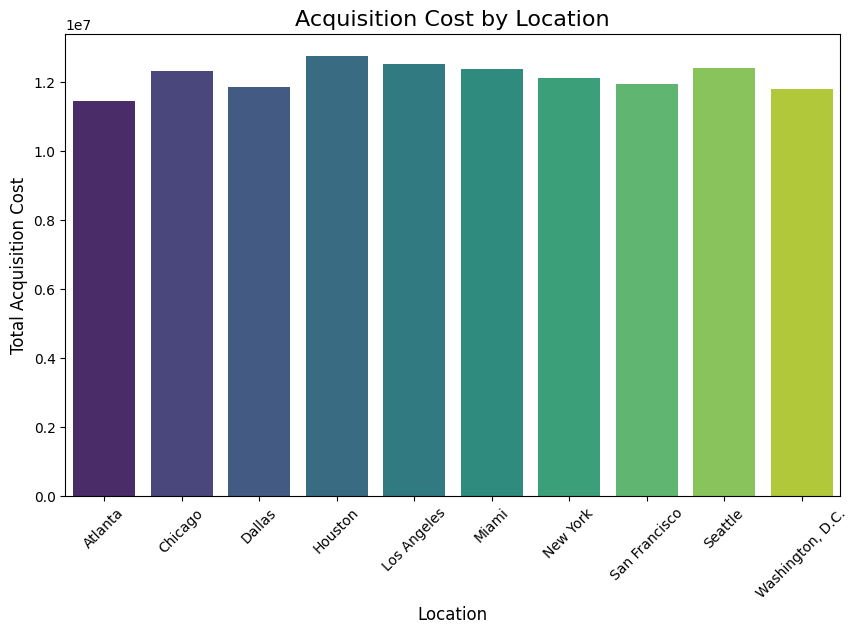

In [119]:
# Determine which location has the highest Acquisition_Cost using a bar chart.

acquisition_cost_by_location = df.groupby('Location')['Acquisition_Cost'].sum().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(x='Location', y='Acquisition_Cost', data=acquisition_cost_by_location, palette='viridis')


plt.title('Acquisition Cost by Location', fontsize=16)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Total Acquisition Cost', fontsize=12)
plt.xticks(rotation=45, fontsize=10)

plt.show()

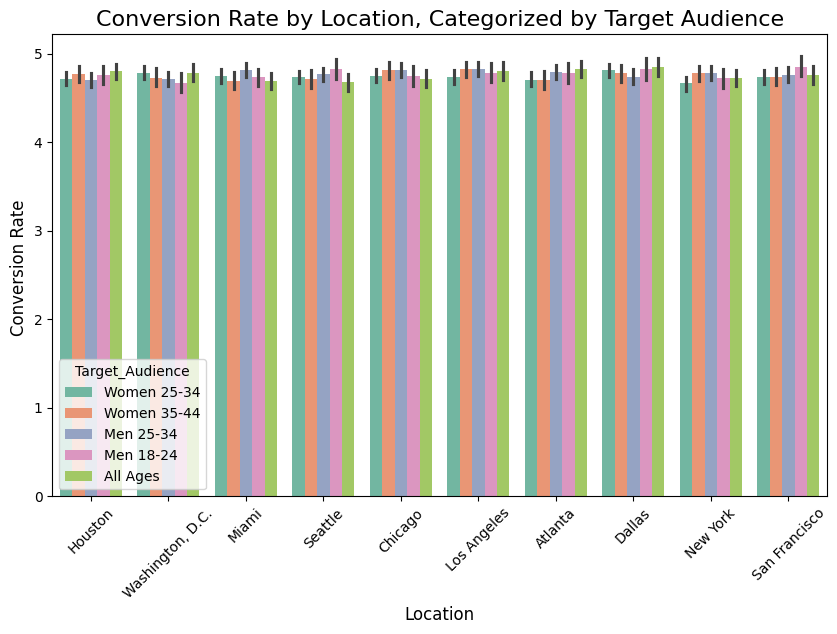

In [121]:
# Visualize the Conversion_Rate by different Location, categorized by Target_Audience, using a bar chart.

plt.figure(figsize=(10, 6))
sns.barplot(x='Location', y='Conversion_Rate', hue='Target_Audience', data=df, palette='Set2')


plt.title('Conversion Rate by Location, Categorized by Target Audience', fontsize=16)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Conversion Rate ', fontsize=12)
plt.xticks(rotation=45, fontsize=10)

plt.show()

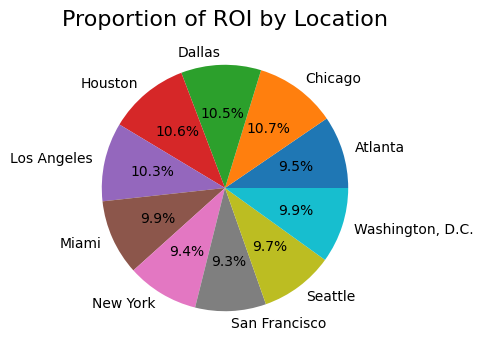

In [123]:
# Illustrate the proportion of ROI by Location using a pie chart

roi_by_location = df.groupby('Location')['ROI'].sum().reset_index()


plt.figure(figsize=(4, 4))
plt.pie(roi_by_location['ROI'], labels=roi_by_location['Location'], autopct='%1.1f%%')
plt.title('Proportion of ROI by Location', fontsize=16)

plt.show()
